* Having	a	good	understanding	of	how	things	work	can	help	you	quickly	home	in
on	the	appropriate	model,	the	right	training	algorithm	to	use,	and	a	good	set	of
hyperparameters	for	your	task.	

# Linear	Regression	model
* Linear	Regression	model is one	of	the simplest	models. There are	two	very	different	ways	to	train	it.
    * Using	a	direct	“closed-form”	equation	that	directly	computes	the	model	parameters
that	best	fit	the	model	to	the	training	set	(i.e.,	the	model	parameters	that	minimize	the
cost	function	over	the	training	set).
    * Using	an	iterative	optimization	approach,	called	Gradient	Descent	(GD),	that
gradually	tweaks	the	model	parameters	to	minimize	the	cost	function	over	the
training	set,	eventually	converging	to	the	same	set	of	parameters	as	the	first	method.

* A	linear	model	makes	a	prediction	by	simply	computing	a	weighted	sum
of	the	input	features,	plus	a	constant	called	the	bias	term	(also	called	the	intercept	term).
$$ \hat{y} =  	\theta_{0} +  	\theta_{1}.x_{1} +  	\theta_{2}.x_{2}...... 	\theta_{n}.x_{n} $$

$ \hat{y} $ ----> predicted value

n           ----> no of features

$ x_{i}$    ----> $i^{th}$ feature value

$ θ_{j} $ 	----> $j^{th}$ 	model	parameter	

* Training	a	model	means	setting	its	parameters	so	that	the	model	best	fits	the	training	set.
* For	this	purpose,	we	first	need	a	measure	of	how	well	(or	poorly)	the	model	fits	the
training	data.
* The	most	common	performance	measure	of	a regression	model	is	the	Root	Mean	Square	Error	(RMSE).	
* Therefore,	to train	a	Linear	Regression	model,	you	need	to	find	the	value	of	θ	that	minimizes	the RMSE.	
* In	practice,	it	is	simpler	to	minimize	the	Mean	Square	Error	(MSE)	than	the
RMSE,	and	it	leads	to	the	same	result.
* The	MSE	of	a	Linear	Regression	hypothesis	h θ 	on	a	training	set	X	is	calculated	using:
$$ MSE(X,h_{θ}) =\frac{1}{m}\sum_{i=1}^{m} (θ^T x^i -y^i)^2 $$

# The	Normal	Equation

* To	find	the	value	of	θ	that	minimizes	the	cost	function,	there	is	a	closed-form	solution	— in	other	words,	a	mathematical	equation	that	gives	the	result	directly.	
* This	is	called	the **Normal	Equation**	
$$ \hat{θ} =(X^T. X)^{-1} . X^T. y$$
* $\hat{θ}$ is the value of $\theta$ that minimises the cost function
* y	is	the	vector	of	target	values

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

In [9]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

##### The	actual	function	that	we	used	to	generate	the	data	is	y	=	4	+	3$x_0$ 	+	Gaussian	noise i.e  $\theta_{0}$ is 4 and $\theta_{1}$ is 3

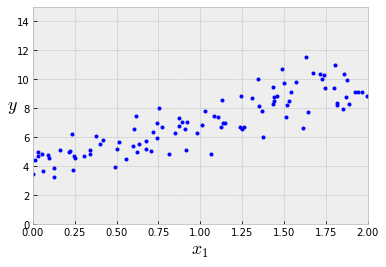

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[ 4.06754852],
       [ 2.92804126]])

#####  From the normal equation we get the values as $\theta_{0}$ is 4.06754 and $\theta_{1}$ is 2.928041.   These values are close enough to the exact values but not the same as exact values because of the presence of some noise

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06754852],
       [ 9.92363104]])

##### Predictions made using the obtained $\hat{\theta}$

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

##### These are model predictions i.e with obtained $\hat{\theta}$ using norml equation

# using	Scikit-Learn

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.06754852]), array([[ 2.92804126]]))

In [18]:
lin_reg.predict(X_new)

array([[ 4.06754852],
       [ 9.92363104]])

# Gradient	Descent

* Gradient	Descent	is	a	very	generic	optimization	algorithm	capable	of	finding	optimal
solutions	to	a	wide	range	of	problems.	
* The	general	idea	of	Gradient	Descent	is	to	tweak
parameters	iteratively	in	order	to	minimize	a	cost	function.
* It	measures	the	local	gradient	of	the	error	function	with	regards	to	the	parameter	vector	θ,and	it	goes	in	the	direction	of	descending	gradient.	
* Once	the	gradient	is	zero,	you	have reached	a	minimum!
* We	start	by	filling	θ	with	random	values	(this	is	called	random	initialization),
and	then	you	improve	it	gradually,	taking	one	baby	step	at	a	time,	each	step	attempting	to
decrease	the	cost	function	(e.g.,	the	MSE),	until	the	algorithm	converges	to	a	minimum

* An	important	parameter	in	Gradient	Descent	is	the	size	of	the	steps,	determined	by	the
learning	rate	hyperparameter.	
* If	the	learning	rate	is	too	small,	then	the	algorithm	will	have
to	go	through	many	iterations	to	converge,	which	will	take	a	long	time